<a href="https://colab.research.google.com/github/SamiOmran/Prediction-of-Product-Sales/blob/master/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sami Imran**

# **Prediction of Product Sales**

**Author:** Sami Imran

## Project Overview

## EDA Utils Functions

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")

  return fig, ax

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")

  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()

  return fig, ax

In [ ]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Load and Inspect Data

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Project/sales_predictions_2023.csv'
df = pd.read_csv(data_path)
df2 = df.copy()

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. **`We have 8523 rows`**
2. **`We have 12 columns`**
3. **`5 numaric columns, 7 string columns`**

## Clean Data

**First check for duplicates and delete them.**

In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

**We have 0 duplciates for now**

**Check for null values**

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**only 2 columns have missing values**


1.   `Item_weight` is numaric column so we use numaric place holder to fill NaN
2.   `Outlet_Size` is object(categorical) column so we use text place holder.




Now before adding place holder we need to check what is the logical values for `Item_weight` column

In [ ]:
min, max = df['Item_Weight'].min(), df['Item_Weight'].max()
min, max

(4.555, 21.35)

In [ ]:
# df['Item_Weight'] = df['Item_Weight'].fillna(0)

In [ ]:
# df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**Now we have 0 NaN values**

**Check for inconsistent values**

In [ ]:
cat_cols = df.select_dtypes('O').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
item_fat_content_dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_content_dict)

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


**We fixed the inconsistent values for `Item_Fat_Content`**

In [ ]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
Large,932


In [ ]:
df['Outlet_Location_Type'].value_counts()
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df[num_cols].describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


**From describe function we can see the mean, max and min values for each column**

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Histograms**

In [ ]:
colors = ['purple', 'blue', 'green', 'yellow', 'red']
list_cols = list(df.select_dtypes('number').columns)

numerical_cols = [(colors[i], list_cols[i]) for i in range(5)]
numerical_cols

[('purple', 'Item_Weight'),
 ('blue', 'Item_Visibility'),
 ('green', 'Item_MRP'),
 ('yellow', 'Outlet_Establishment_Year'),
 ('red', 'Item_Outlet_Sales')]

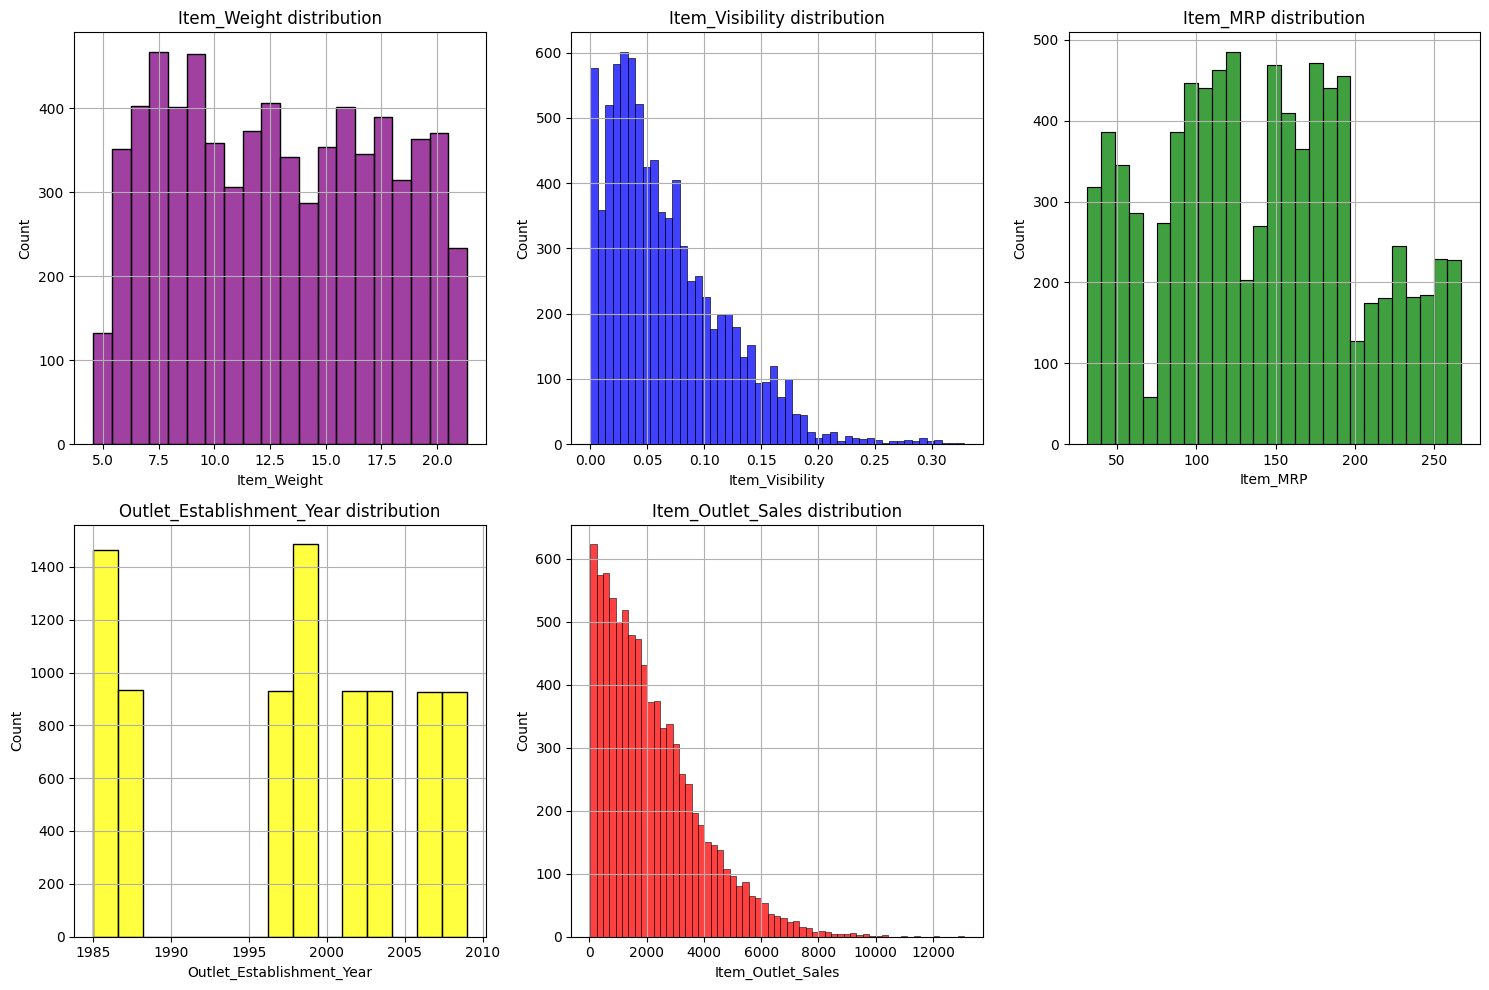

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));
ax[1][2].axis('off')

for i in range(2):
  for j in range(3):
    index = i*3+j

    if index < len(numerical_cols):
      color = numerical_cols[index][0]
      feature_name = numerical_cols[index][1]

      subplot = sns.histplot(df[feature_name], ax = ax[i, j], color = color)
      subplot.set_title(f'{feature_name} distribution')
      subplot.grid()

fig.tight_layout()
plt.show()
fig.savefig('histograms.png', dpi = 300)

**From the figure above we can see the distribution for each numerical columns:**

1. For **Item_Weight** column we have more than 1400 missing values(weight = 0g),the minimum weight is 4.5g and the maximum weight is 21.35g


2. For **Item_Visibility** column the distribution goes from 0.0% - 0.35%

3. For **Outlet_Establishment_Year** column the range from 1985 - 2009



### **Box plots**

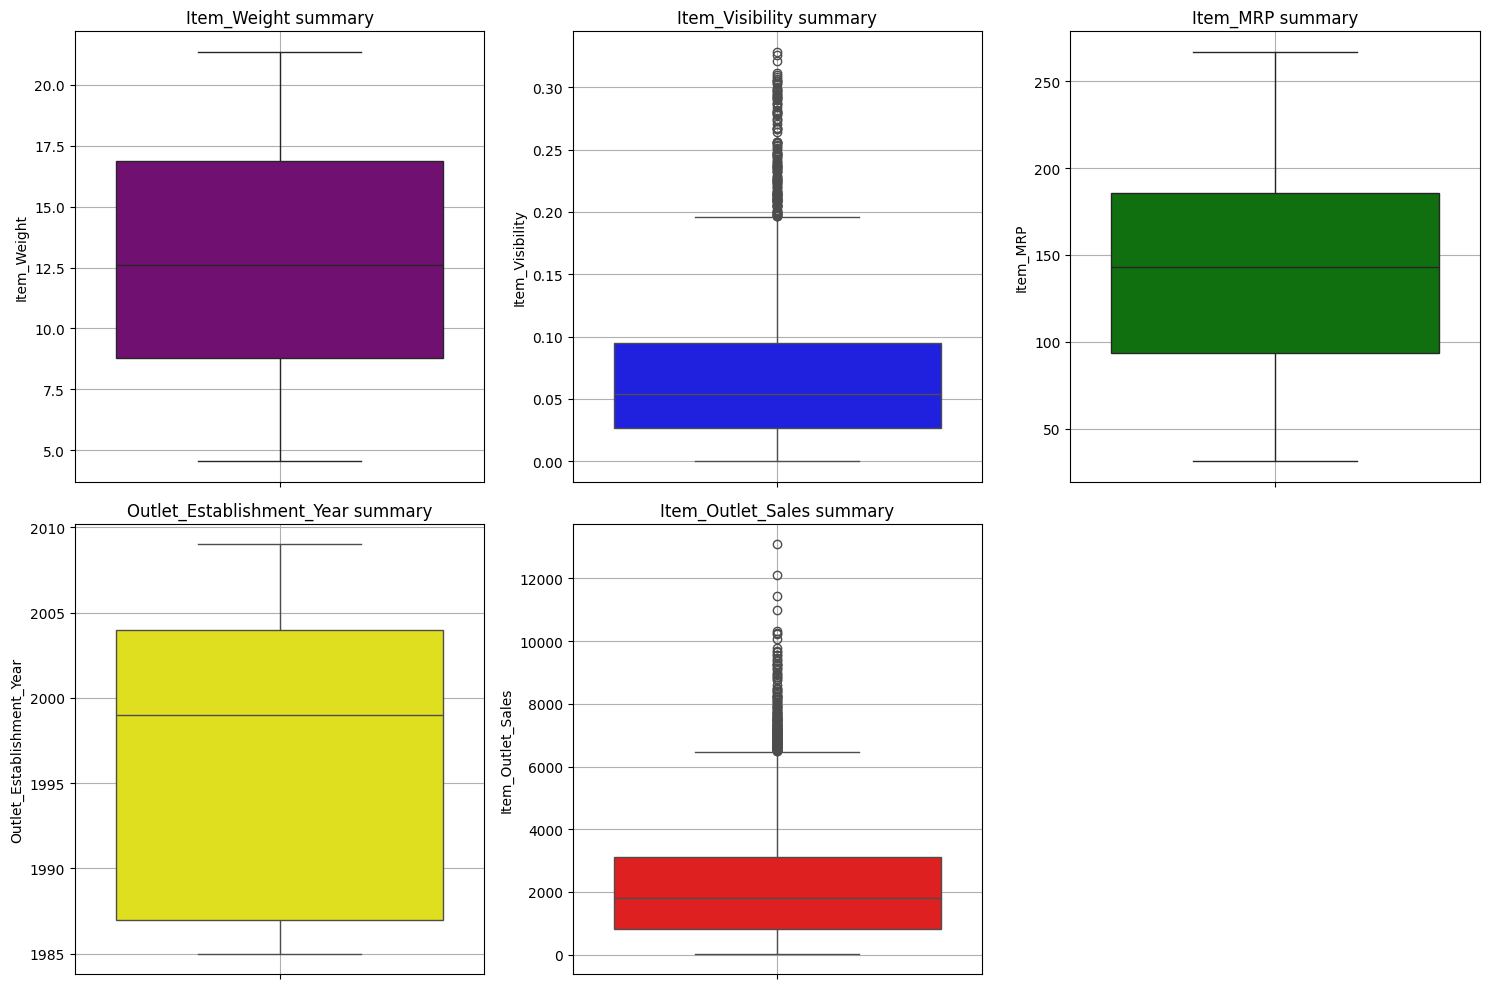

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));
ax[1][2].axis('off')

for i in range(2):
  for j in range(3):
    index = i*3+j

    if index < len(numerical_cols):
      color = numerical_cols[index][0]
      feature_name = numerical_cols[index][1]

      subplot = sns.boxplot(df[feature_name], ax = ax[i, j], color = color)
      subplot.set_title(f'{feature_name} summary')
      subplot.grid()

fig.tight_layout()
plt.show()

1. We can see **Item_Visiblity** and **Item_Outlet_Sales** columns have outliers
  
  - `visisbility > 0.2` considered outliers
  - `outelet_sales > 6300$` considered outliers
2. We can say that **Item_MRP** can be normal distribution while others are not.

3. Outlet_Establishment_Year is skewed to the left

4. The median(Q2) for each feature:
  - **Item_Weight** approx: `12g`

  - **Item_Visibility** approx: `0.06`

  - **Item_MRP** approx: `140$`

  - **Outlet_Establishment_Year** approx: `1999`

  - **Item_Outlet_Sales** approx: `1950$`

### **Count plots**

In [ ]:
cat_cols = df.select_dtypes('O').drop('Item_Identifier', axis = 1).columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

**Here we dropped Item_Identifier feature from the list**:
- since its only the id of the product.
- there are lot of items in the df so it won't have meaning to plot it.

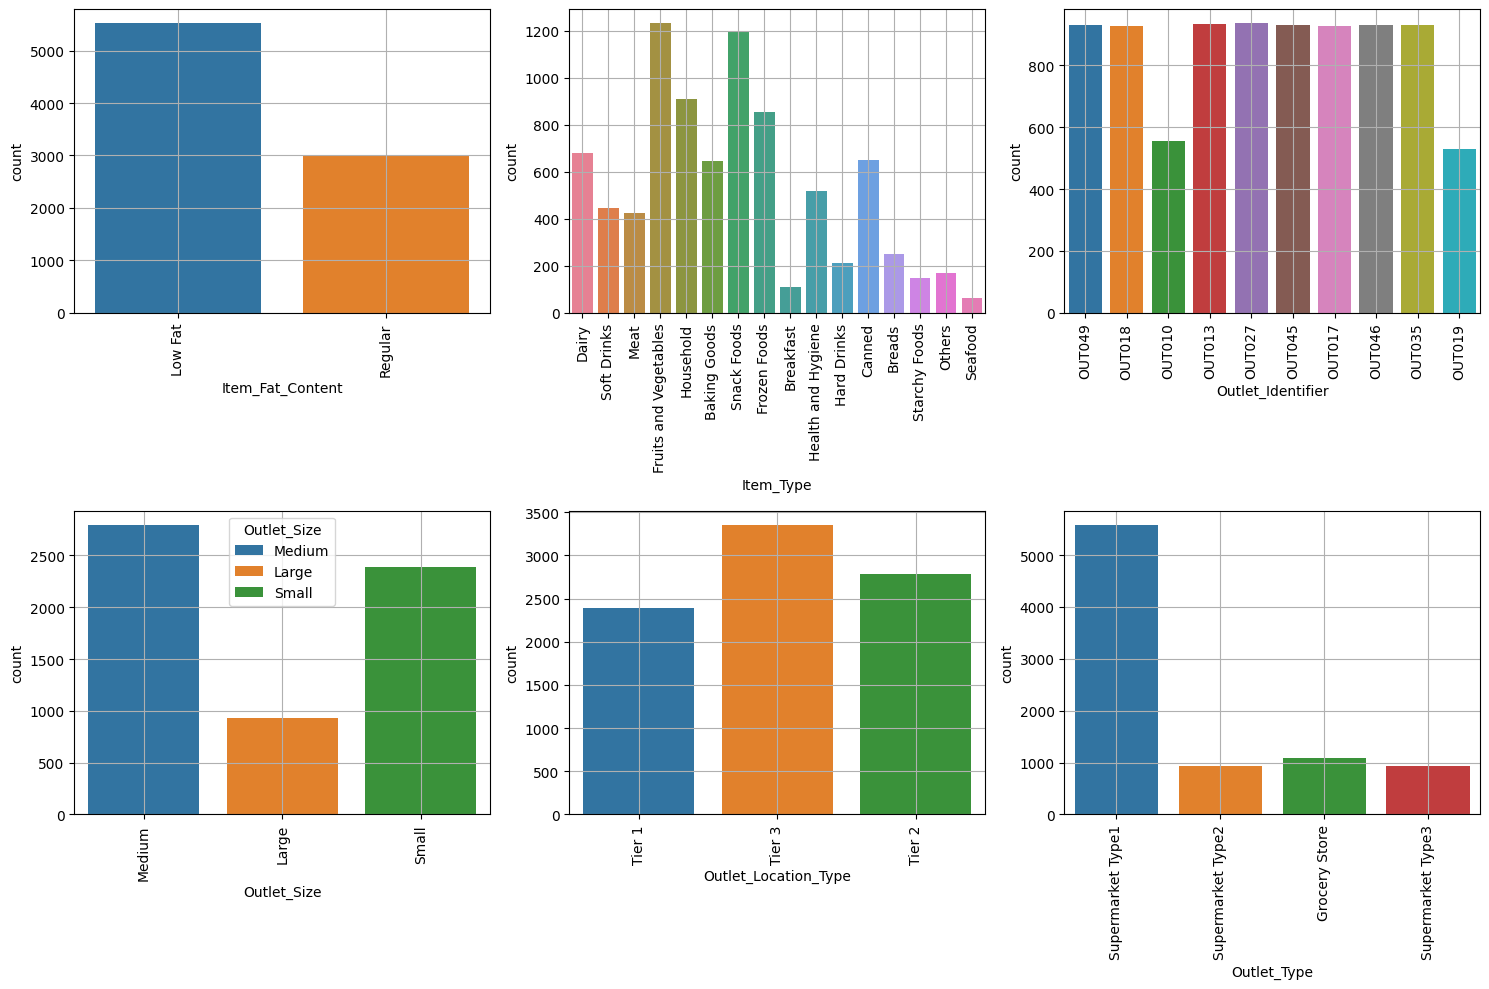

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));

for i in range(2):
  for j in range(3):
    index = i*3+j
    if index < len(cat_cols):
      feature_name = cat_cols[index]

      subplot = sns.countplot(
          data = df,
          x = df[feature_name],
          ax = ax[i, j],
          hue = df[feature_name],
      )
      subplot.xaxis.set_tick_params(rotation = 90)
      subplot.grid()

fig.tight_layout()
plt.show()

We can see the frequency of each class in all features:
1. `5500` of items are **Low_Fat** Items, while the rest(3000) are regular fat items.

2. The most occurred items are **Fruits and Vegetables** `1250` times while **Seafood** are the lowest occurred approx `90` times

3. The most occurred outlet in df is OUT027 approx `950` times

4. `2700` of outlets are medium size the most, the least are large outlets `950` outlets.

### **Correlation**

In [ ]:
corr = df.corr(numeric_only = True).round(3)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000,-0.014,0.027,-0.012,0.014
Item_Visibility,-0.014,1.000,-0.001,-0.075,-0.129
Item_MRP,0.027,-0.001,1.000,0.005,0.568
Outlet_Establishment_Year,-0.012,-0.075,0.005,1.000,-0.049
Item_Outlet_Sales,0.014,-0.129,0.568,-0.049,1.000


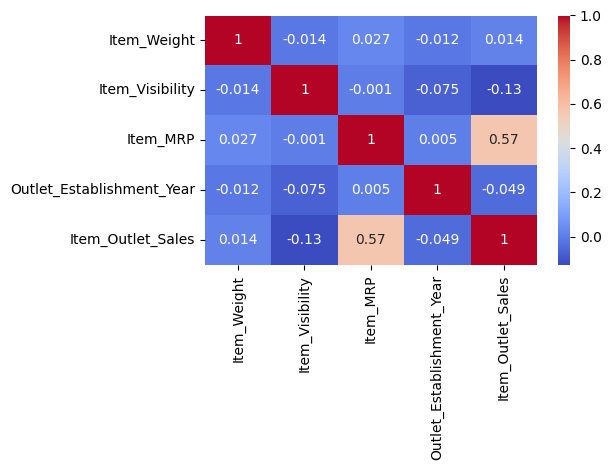

In [ ]:
ax = sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'coolwarm',
);

ax.figure.tight_layout()
ax.figure.savefig('heatmap.png', dpi = 300)

**As shown in heatmap we can see:**

1. Item_Weight have moderate **+ve** relation with Outlet_Establishment_Year (0.52)
2. Item_MRP have moderate **+ve** relation with Item_Outlet_Sales (0.57)


### **Item_Weight & Item_fat_content**

We want to explore the weights of items with fat_content

In [ ]:
# function to create bar plots with given params
def bar_plot(x, y, hue = None, palette = None, x_size = 10, y_size = 5):
  fig, ax = plt.subplots(figsize = (x_size, y_size))

  ax = sns.barplot(
      data = df,
      x = x,
      y = y,
      hue = hue,
      palette = palette,
  )

  ax.xaxis.set_tick_params(rotation = 90)
  ax.set_title(f'{x} & {y}');
  ax.set_facecolor('#E0E0E0')
  ax.grid(axis = 'y')

  return ax

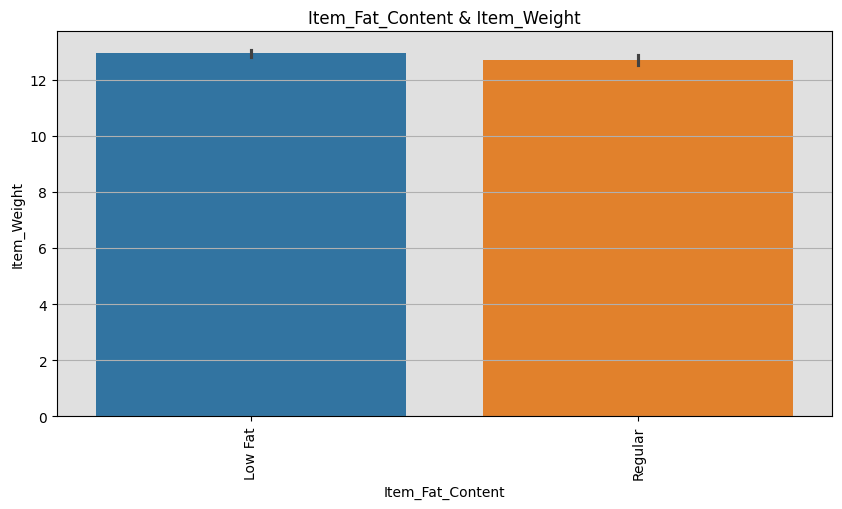

In [ ]:
bar_plot(
    x = 'Item_Fat_Content',
    y = 'Item_Weight',
    hue = 'Item_Fat_Content',
);

**Here we can see that the average weight items of `Low_Fat` & `Regular` are close**

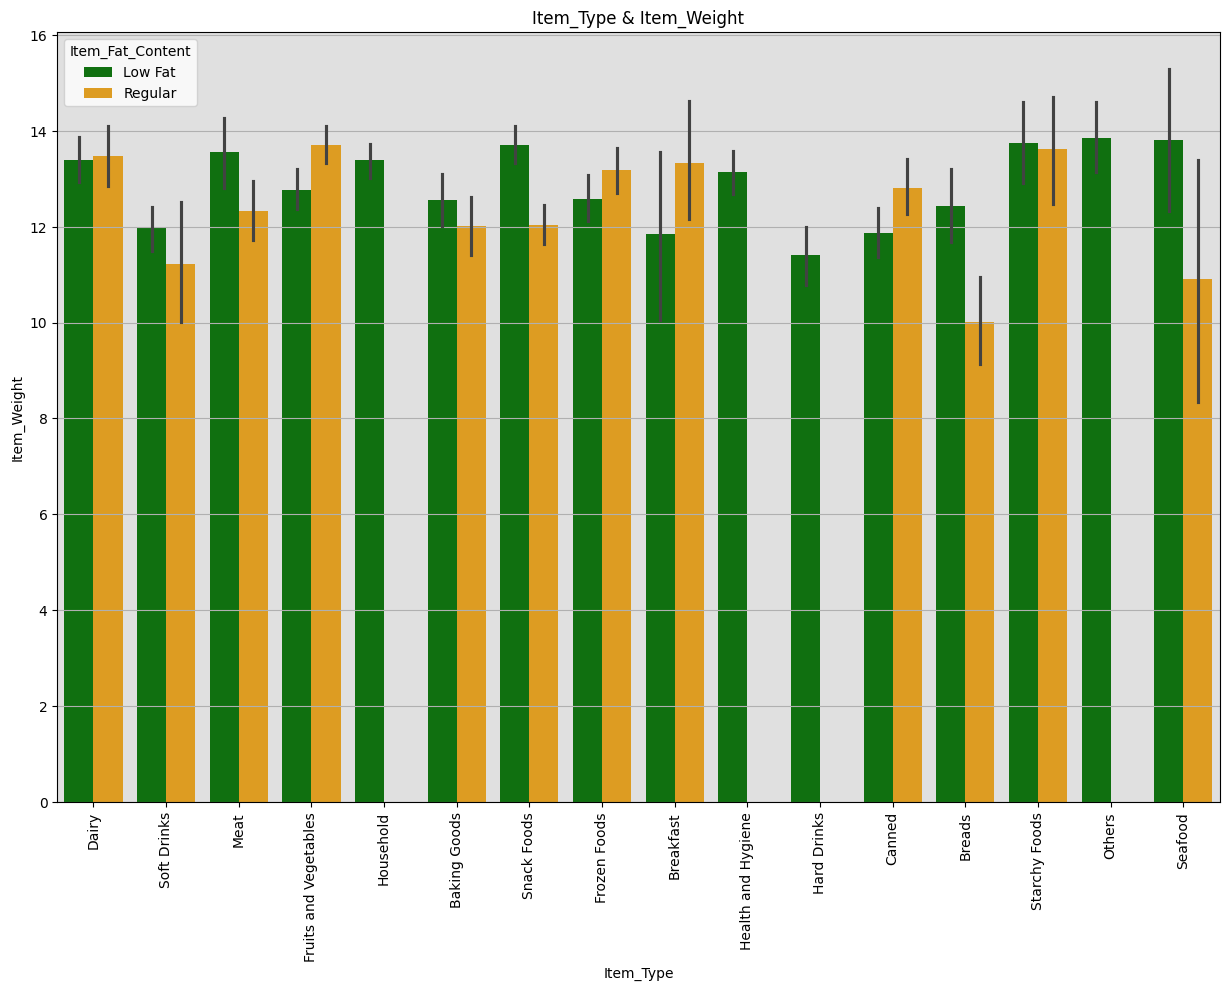

In [ ]:
ax = bar_plot(
    x = 'Item_Type',
    y = 'Item_Weight',
    hue = 'Item_Fat_Content',
    palette = {'Regular': '#fca503', 'Low Fat': 'green'},
    x_size = 15,
    y_size = 10,
)

ax.figure.savefig('item_weight_fat_content.png', dpi = 300);

**Here we are seeing the weights based on item types:**
- The average weight of `starchy foods` with **low-fat** content is the highest among other types. Also `starchy foods` with **regular-fat** content is the highest.

- `Household`, `Health and Hygiene`, `Hard Drinks` and `others` are only `low fat` items


### **Item_MRP & Item_Outlet_Sales**

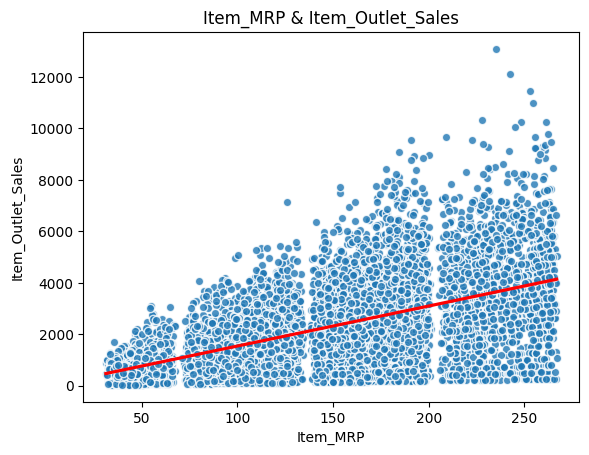

In [ ]:
scatter_kws = {'edgecolor': 'white'}
line_kws = {'color': 'red'}

ax = sns.regplot(
    data = df,
    x = 'Item_MRP',
    y = 'Item_Outlet_Sales',
    scatter_kws = scatter_kws,
    line_kws = line_kws,
)

ax.set_title('Item_MRP & Item_Outlet_Sales');
ax.figure.savefig('item_mrp_outlet_sales.png', dpi = 300)

From the plot, we can see that it's divided into 4 different groups, but in general, we can say that whenever the `MRP` increases the `outlet_sales` increases

### **Item_MRP & Item_Visibility**

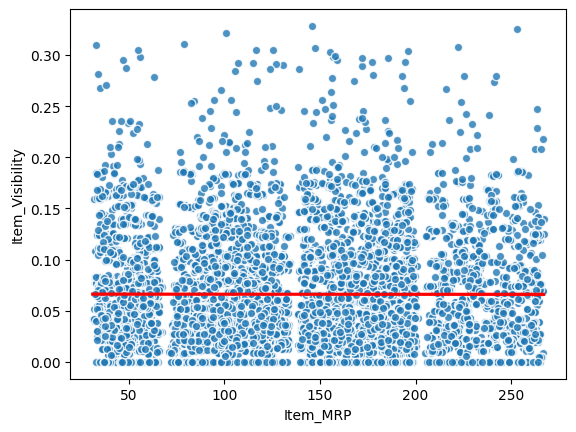

In [ ]:
ax = sns.regplot(
    data = df,
    x = 'Item_MRP',
    y = 'Item_Visibility',
    scatter_kws = scatter_kws,
    line_kws = line_kws,
)

**We can see that there is no relation between `Item_MRP` & `Item_Visibility`**

## Feature Inspection

### **Item_weight**:

**Weight of a product**

In [ ]:
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

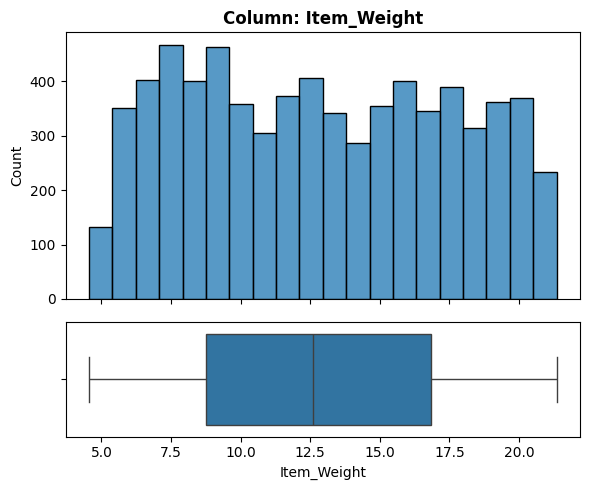

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, x = feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - **numeric**.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `1463` (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

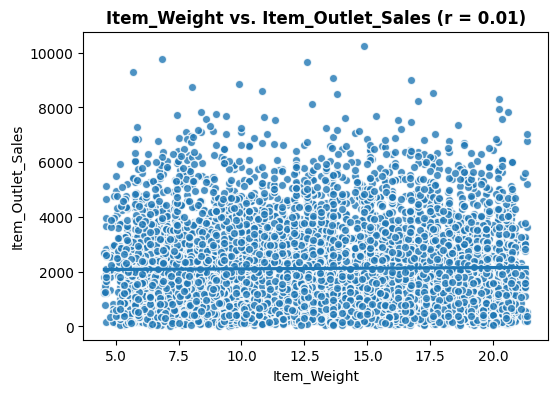

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, No relationship.
  - Does this feature appear to be a predictor of the target?
    - No

___

### **Item_fat_content**:

**whether the product is low_fat ot regular**

In [ ]:
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

<ipython-input-2-0316f2994d09>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


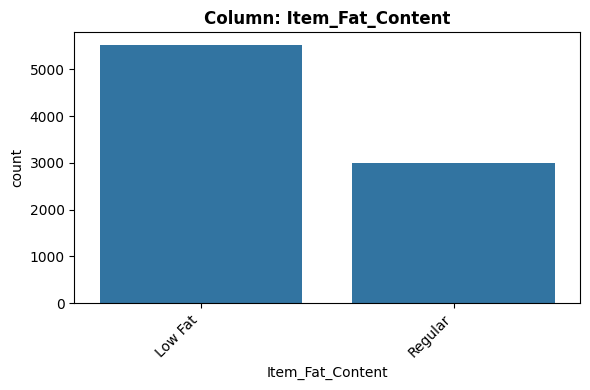

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, x = feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - **nominal**.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `0`

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

<ipython-input-4-532e1130403e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


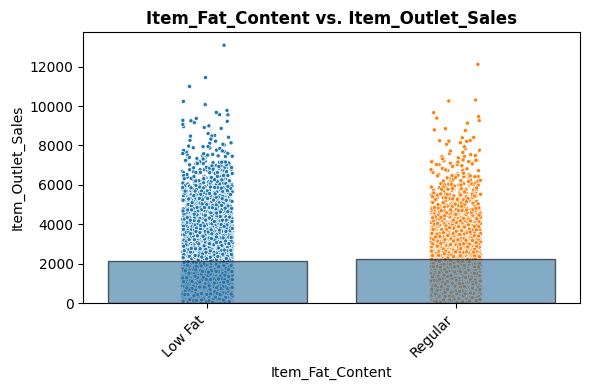

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Maybe.
  - Does this feature appear to be a predictor of the target?
    - No, They are both similar

___

### **Item_Visibility**:

**The percentage of total display area of all products in a store allocated to the particular product**

In [ ]:
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

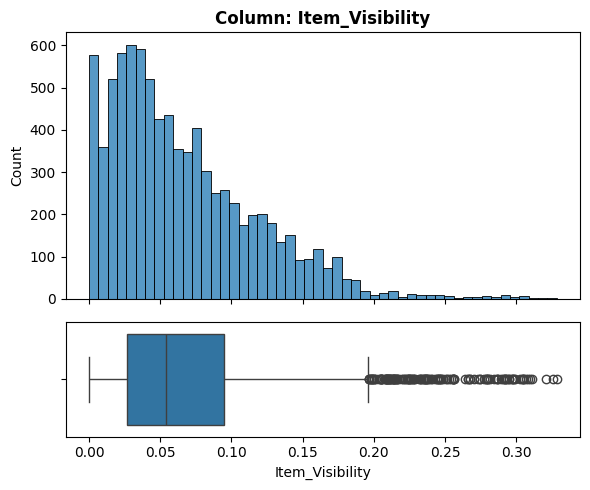

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, x = feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - **numeric**.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `0`

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

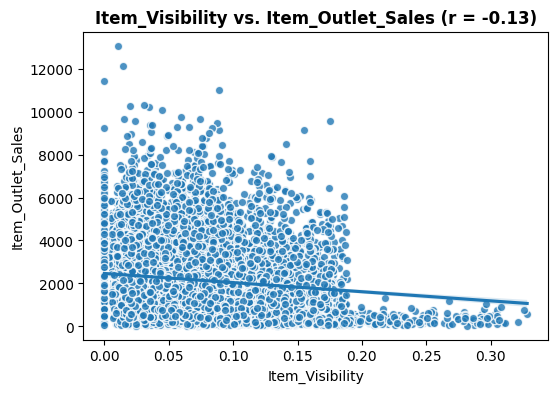

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Its negative relation

___

### **Item_Type**:

**The category to which the product belongs**

In [ ]:
feature = 'Item_Type'
df[feature].dtype

dtype('O')

<ipython-input-2-0316f2994d09>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


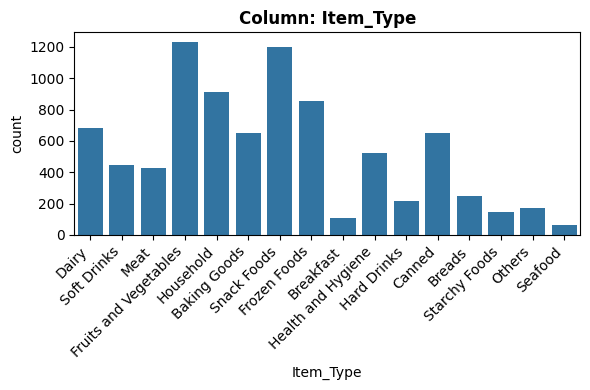

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, x = feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - **nominal**.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `0`

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

<ipython-input-4-532e1130403e>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


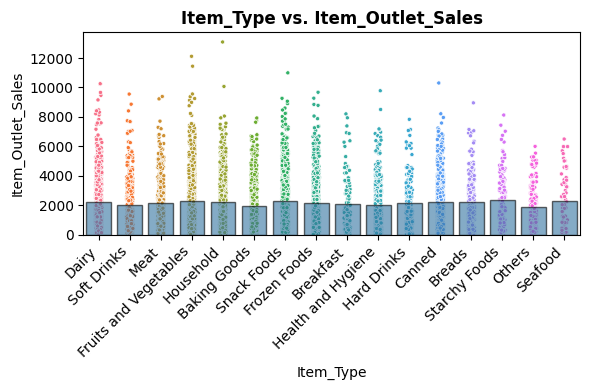

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes some types have affected outlet_sales

___

### **Item_MRP**:

**Maximum Retail Price (list price) of the product**

In [ ]:
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

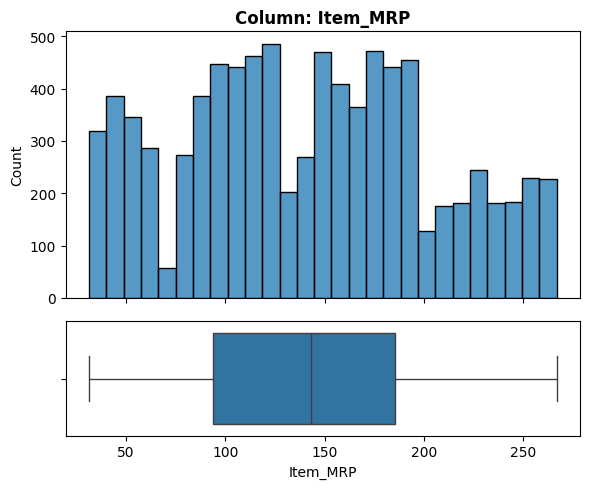

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, x = feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - **numeric**.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `0`

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

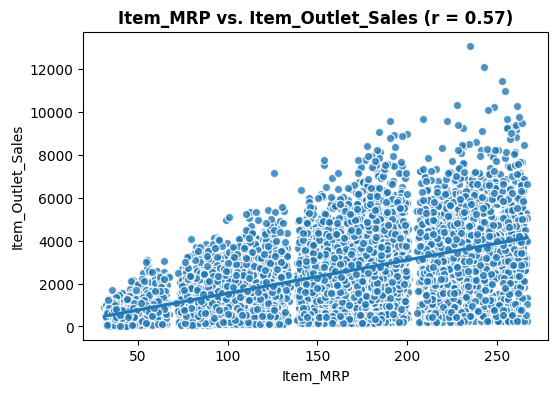

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes when mrp increases the outlet_sales increase.

___

# Project PART 5

## Preprocesing for Machine Learning


## clean data

In [ ]:
item_fat_content_dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace(item_fat_content_dict)
df2['Outlet_Size'] = df2['Outlet_Size'].replace('High', 'Large')

In [ ]:
df2.drop('Item_Identifier', axis = 1, inplace = True)

In [ ]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GroupImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_column, strategy='mean'):
        self.group_column = group_column
        self.strategy = strategy

    def fit(self, X, y=None):
        # Find the mean or median per group
        self.group_stats_ = X.groupby(self.group_column).agg({col: self.strategy for col in X.columns if col != self.group_column})
        return self

    def transform(self, X):
        # Apply the imputation per group
        X_imputed = X.copy()
        for col in X.columns:
            if col != self.group_column:
                for group, stats in self.group_stats_.iterrows():
                    # Impute missing values in a group by the group's mean or median
                    group_mask = (X_imputed[self.group_column] == group)
                    X_imputed.loc[group_mask, col] = X_imputed.loc[group_mask, col].fillna(stats[col])
        return X_imputed

In [ ]:
from sklearn import set_config

set_config(transform_output = 'pandas')
pd.set_option('display.max_columns', 100)

In [ ]:
y = df2.pop('Item_Outlet_Sales')
X = df2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
num_cols = X_train.select_dtypes('number').columns
ord_cols = ['Outlet_Size']
cat_cols = X_train.select_dtypes('object').drop('Outlet_Size', axis = 1).columns

## Create needed transofmers

In [ ]:
# Numeric features
X_train[num_cols].isna().sum()

,0
Item_Weight,1107
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [ ]:
# Imputer
impute_median = SimpleImputer(strategy = 'median')

# scaler
num_scaler = StandardScaler()

# pipline
num_pipe = make_pipeline(impute_median, num_scaler)

In [ ]:
# check missing values of ordinal features
X_train[ord_cols].isna().sum()

,0
Outlet_Size,1812


In [ ]:
X_train['Outlet_Size'].value_counts(dropna = False)

,count
Outlet_Size,
Medium,2103
NaN,1812
Small,1788
Large,689


In [ ]:
# Imputer
impute_na_ord = SimpleImputer(strategy = 'constant', fill_value = 'NA')

# ORDER
ord_order = ['NA', 'Small', 'Medium', 'Large']

# Encoder
ord_encoder = OrdinalEncoder(categories = [ord_order])

# Scaler
ord_scaler = StandardScaler()

# pipline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, ord_scaler)

In [ ]:
# check missing values of nominal features
X_train[cat_cols].isna().sum()

,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# OneHot Encoder
cat_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

# pipline
cat_pipe = make_pipeline(cat_encoder)

## Create 3-tuples for Column Transform

In [ ]:
num_tuple = ('numeric', num_pipe, num_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
cat_tuple = ('nominal', cat_pipe, cat_cols)

## Create Column Transformer object

In [ ]:
column_transformer = ColumnTransformer(transformers = [num_tuple, ord_tuple, cat_tuple],
                                       verbose_feature_names_out = False)
column_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [ ]:
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Project PART 6

## Helper functions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)

  if verbose:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")

  if output_dict:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}

      return metrics

In [ ]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')

  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data')

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

## Modeling

### Liner Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# initiate the model
lin_reg = LinearRegression()

# fit the model
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
# evaluate the model
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test, False, True)

,MAE,MSE,RMSE,R^2
Training Data,847.129,1297558.136,1139.104,0.562
Test Data,804.120,1194349.715,1092.863,0.567


**R^2 is close on both training and testing, but the value `0.56` low so we say our model is underfitting**

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# initiate the model
rf_reg = RandomForestRegressor(random_state=42)

# fit the model
rf_reg.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# evaluate the model
evaluate_regression(rf_reg, X_train_processed, y_train, X_test_processed, y_test, False, True)

,MAE,MSE,RMSE,R^2
Training Data,296.405,183208.962,428.029,0.938
Test Data,767.797,1219598.867,1104.355,0.558


**The model is overfitting, on training the R^2 is `0.93` and on testing is very low `0.55`**

---
**Both models `Random Forests` & `Liner Regression` have similar test scores**


### GridSearch CV

In [ ]:
# get the default params from random forest model
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {
    'max_depth': [4, 5, None],
    'max_features': [0.2, 0.5, 0.7, 'log2', 'sqrt'],
    'n_estimators': [10, 50, 70, 100, 150, 200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

# initiate the grid search
grid_search = GridSearchCV(
    estimator = rf_reg,
    param_grid = params,
    n_jobs = -1,
    verbose = 1,
    cv = 3,)

start = time()
# fit the grid search
grid_search.fit(X_train_processed, y_train)
print(f'Time taken: {time() - start}')

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Time taken: 266.89725041389465


In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=5, max_features=0.7, n_estimators=200,
                      random_state=42)

In [ ]:
evaluate_regression(best_model, X_train_processed, y_train, X_test_processed, y_test, False, True)

,MAE,MSE,RMSE,R^2
Training Data,756.538,1153094.748,1073.822,0.610
Test Data,730.629,1096006.070,1046.903,0.603


**we can see than training R^2 got decreased by 0.3 but it increased the testing R^2 and close**

In [ ]:
# other try
params = {
    'max_depth': [5, 6, 7, None],
    'max_features': [0.7, .9, 1],
    'n_estimators': [150, 200, 250, 300, 350]
}

# initiate the grid search
grid_search = GridSearchCV(
    estimator = rf_reg,
    param_grid = params,
    n_jobs = -1,
    verbose = 1,
    cv = 3,)

start = time()
# fit the grid search
grid_search.fit(X_train_processed, y_train)
print(f'Time taken: {time() - start}')

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Time taken: 503.95848989486694


In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=6, max_features=0.9, n_estimators=150,
                      random_state=42)

In [ ]:
evaluate_regression(best_model, X_train_processed, y_train, X_test_processed, y_test, False, True)

,MAE,MSE,RMSE,R^2
Training Data,742.023,1111228.414,1054.148,0.625
Test Data,726.191,1096196.046,1046.994,0.603


**We noticed slight increase in training from `0.61` -> `0.625` and testing was same**

## Evaluation

- Overall, which model do you recommend?

`Random Forest after tuning the hyper parameters`

- Justify your recommendation.

`Liner regression model results not good 0.5 we can say underfitting, and default  random forest was over fitting`

- Interpret your model's performance based on R-squared

`Our model can exaplain 60% of the target variance to predict the outlet_sales`

In [ ]:
df['Item_Outlet_Sales'].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.

`The RMSE for training dataset was 1054.148$ off and for testing 1046.994$ off, and its bad since the mean for Item_Outlet_Sales in the dataset is 2181$`

- Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

`Its not overfitting since testing and training scores are close, and not underfitting `